In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 셋 생성
raw_data = pd.read_excel('data/heart-disease.xlsx')
raw_data.head()

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,0,108,1,1.5,2,3,3,1
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
raw_data.info() #object가 있다? 결측치를 의심

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshtbps     303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hsl           303 non-null    object 
 13  heartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [4]:
raw_data[raw_data['chol']=='?']

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1


In [5]:
raw_data[raw_data['ca']=='?']

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [6]:
raw_data[raw_data['hsl']=='?']

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,1


In [7]:
#raw_data.replace("?",np.nan,inplace=True)
clean_data=raw_data.replace("?",np.nan)
clean_data

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
0,63,1,1,145,233.0,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286.0,0,0,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,NaN,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250.0,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204.0,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264.0,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193.0,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131.0,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236.0,0,2,174,0,0.0,2,1.0,3.0,1


In [8]:
clean_data=clean_data.dropna() # nan값이 있는 row를 제거.
clean_data

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
0,63,1,1,145,233.0,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286.0,0,0,108,1,1.5,2,3.0,3.0,1
3,37,1,3,130,250.0,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204.0,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236.0,0,0,178,0,0.8,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241.0,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264.0,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193.0,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131.0,0,0,115,1,1.2,2,1.0,7.0,1


In [9]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshtbps     296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  hsl           296 non-null    float64
 13  heartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB


In [10]:
#최종적으로 결측치 확인
clean_data.isnull().sum()
clean_data.isna().sum()

age             0
sex             0
cp              0
treshtbps       0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hsl             0
heartDisease    0
dtype: int64

In [11]:
#맨 오른쪽 필드 보려고
clean_data.columns

Index(['age', 'sex', 'cp', 'treshtbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'hsl', 'heartDisease'],
      dtype='object')

In [12]:
Input=clean_data.iloc[:,:-1]
Target=clean_data.iloc[:,[-1]] #타겟도 인풋도 판다스 데이터프레임이니까 꺽쇄괄호추가
Target

,heartDisease
0,0
1,1
3,0
4,0
5,0
...,...
297,1
298,1
299,1
300,1


In [13]:
# 데이터 전체에 심장병 발병자가 너무 적으면 못 쓰는 데이터이다.
# 심장병 발병자의 수를 확인할 것
Target["heartDisease"].sum()

136

In [14]:
#심장병걸린환자비율 조사심장병걸린환자비율 조사
Target["heartDisease"].mean()

0.4594594594594595

In [15]:
Input.head(2)

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl
0,63,1,1,145,233.0,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286.0,0,0,108,1,1.5,2,3.0,3.0


In [16]:
#scale 조정
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Input)
scaled_input=scaler.transform(Input)
scaled_input=pd.DataFrame(scaled_input)
scaled_input

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.942285,0.692820,-2.236793,0.747441,-0.277228,2.425638,1.020526,0.014451,-0.692820,1.074839,2.264087,-0.718421,0.660262
1,1.385714,0.692820,0.876486,1.592523,0.742265,-0.412263,-0.993312,-1.818794,1.443376,0.386756,0.645320,2.487397,-0.890830
2,-1.939999,0.692820,-0.161274,-0.097641,0.049779,-0.412263,-0.993312,1.629453,-0.692820,2.106963,2.264087,-0.718421,-0.890830
3,-1.496571,-1.443376,-1.199033,-0.097641,-0.835064,-0.412263,1.020526,0.974723,-0.692820,0.300746,-0.973448,-0.718421,-0.890830
4,0.166286,0.692820,-1.199033,-0.661029,-0.219521,-0.412263,-0.993312,1.236615,-0.692820,-0.215316,-0.973448,-0.718421,-0.890830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.277143,-1.443376,0.876486,0.465747,-0.123343,-0.412263,-0.993312,-1.164064,1.443376,-0.731379,0.645320,-0.718421,1.177293
292,-1.053142,0.692820,-2.236793,-1.224417,0.319079,-0.412263,-0.993312,-0.771225,-0.692820,0.128725,0.645320,-0.718421,1.177293
293,1.496571,0.692820,0.876486,0.691102,-1.046657,2.425638,-0.993312,-0.378387,-0.692820,2.020953,0.645320,1.418791,1.177293
294,0.277143,0.692820,0.876486,-0.097641,-2.239272,-0.412263,-0.993312,-1.513253,1.443376,0.128725,0.645320,0.350185,1.177293


In [17]:
scaled_input.describe().T

,count,mean,std,min,25%,50%,75%,max
0,296.0,4.500904e-18,1.001693,-2.826856,-0.720571,0.166286,0.720571,2.494285
1,296.0,2.850573e-17,1.001693,-1.443376,-1.443376,0.692820,0.692820,0.692820
2,296.0,1.200241e-16,1.001693,-2.236793,-0.161274,-0.161274,0.876486,0.876486
3,296.0,6.067781e-16,1.001693,-2.125838,-0.661029,-0.097641,0.465747,3.846075
4,296.0,1.997276e-17,1.001693,-2.335451,-0.700414,-0.084871,0.554717,6.089796
5,296.0,7.501507e-19,1.001693,-0.412263,-0.412263,-0.412263,-0.412263,2.425638
6,296.0,2.182939e-16,1.001693,-0.993312,-0.993312,-0.489853,1.020526,1.020526
7,296.0,6.458797e-16,1.001693,-3.433796,-0.694840,0.145397,0.712830,2.284183
8,296.0,5.926190e-17,1.001693,-0.692820,-0.692820,-0.692820,1.443376,1.443376
9,296.0,-7.951597e-17,1.001693,-0.903399,-0.903399,-0.215316,0.472766,4.429243


In [18]:
# 학습데이터: 테스트데이터 = 7:3
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(scaled_input,Target,test_size=0.3,random_state=5)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(207, 13) (89, 13) (207, 1) (89, 1)


In [19]:
# 2. 모델 구성
model = Sequential()
model.add(Dense(units=500,input_dim=13,activation='tanh'))
#과적합을 해결하고자 기억하되 두루뭉실하게 기억하기
model.add(Dropout(0.3))
model.add(Dense(units=200,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(units=100,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               7000      
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [20]:
# 3. 학습과정 설정
from tensorflow.keras import metrics
# accuracy(정확도) : 예측결과와 실제값이 동일한 건수 / 전체 건수로 나눈 것
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
# Recall(재현율): 실제 True인데 예측도 True로 한 건수 / 실제 TRUE인 건수
#model.comlile(loss="categorical_crossentropy",optimizer='nadam',metrics=[metrics.Recall])
# Precision(정밀도) : 실제 True인데 예측도 True로 한 건수 /True로 예측한 건수 
#model.comlile(loss="categorical_crossentropy",optimizer='nadam',metrics=[metrics.Precision])

In [21]:
# 4. 학습시키기
hist = model.fit(X_train, Y_train, epochs=50, batch_size=50, 
                     validation_split=0.2, verbose=2) #20퍼센트를 뜯어서 검증데이터로 쓰기

Epoch 1/50
4/4 - 7s - loss: 0.1851 - accuracy: 0.7030 - val_loss: 0.0721 - val_accuracy: 0.9048
Epoch 2/50
4/4 - 0s - loss: 0.1202 - accuracy: 0.8364 - val_loss: 0.0767 - val_accuracy: 0.9048
Epoch 3/50
4/4 - 0s - loss: 0.1078 - accuracy: 0.8485 - val_loss: 0.0866 - val_accuracy: 0.9048
Epoch 4/50
4/4 - 0s - loss: 0.1183 - accuracy: 0.8485 - val_loss: 0.0958 - val_accuracy: 0.9048
Epoch 5/50
4/4 - 0s - loss: 0.1143 - accuracy: 0.8364 - val_loss: 0.1072 - val_accuracy: 0.9048
Epoch 6/50
4/4 - 0s - loss: 0.1192 - accuracy: 0.8424 - val_loss: 0.1139 - val_accuracy: 0.8810
Epoch 7/50
4/4 - 0s - loss: 0.1084 - accuracy: 0.8364 - val_loss: 0.1226 - val_accuracy: 0.8333
Epoch 8/50
4/4 - 0s - loss: 0.1092 - accuracy: 0.8303 - val_loss: 0.1328 - val_accuracy: 0.8333
Epoch 9/50
4/4 - 0s - loss: 0.1026 - accuracy: 0.8788 - val_loss: 0.1412 - val_accuracy: 0.8333
Epoch 10/50
4/4 - 0s - loss: 0.1097 - accuracy: 0.8364 - val_loss: 0.1423 - val_accuracy: 0.8095
Epoch 11/50
4/4 - 0s - loss: 0.1036 - a

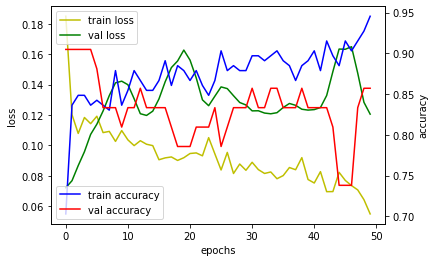

In [22]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

In [23]:
# 5.평가 및 예측
score = model.evaluate(X_test, Y_test, verbose=0)
print('model loss :', score[0])
print('model accuracy :', score[1])

model loss : 0.14152076840400696
model accuracy : 0.8314606547355652


In [24]:
# 6. metrix(성능평가지표)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pred=model.predict(X_test)
pred=(pred>0.5)
pred

print(confusion_matrix(Y_test,pred),end='\n')
print('f1_score :',f1_score(Y_test,pred))

[[37  5]
 [10 37]]
f1_score : 0.8314606741573034
